# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> As you will see from the class email, I have revised the current exercise questions more than usual, as I found that the submission rate for the previous exercise problem-sets was less than ideal.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [5]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Below are the lines of code that lead to an answer:

In [6]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA

In [10]:
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix
import seaborn as sns

import random

In [51]:
random_ticker = list_of_tickers.sample(40, random_state = 627)
random_ticker

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
55,AZO,AutoZone,reports,Consumer Discretionary,Specialty Stores,"Memphis, Tennessee",1997-01-02,866787,1979
151,DISH,Dish Network,reports,Communication Services,Cable & Satellite,"Meridian, Colorado",2017-03-13,1001082,1980
18,ARE,Alexandria Real Estate Equities,reports,Real Estate,Office REITs,"Pasadena, California",2017-03-20,1035443,1994
152,DIS,Disney,reports,Communication Services,Movies & Entertainment,"Burbank, California",1976-06-30,1744489,1923
472,VFC,VF Corporation,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Denver, Colorado",1979-06-30,103379,1899
314,MCHP,Microchip Technology,reports,Information Technology,Semiconductors,"Chandler, Arizona",2007-09-07,827054,1989
76,BSX,Boston Scientific,reports,Health Care,Health Care Equipment,"Marlborough, Massachusetts",1995-02-24,885725,1979
261,IRM,Iron Mountain,reports,Real Estate,Specialized REITs,"Boston, Massachusetts",2009-01-06,1020569,1951
408,SPGI,S&P Global,reports,Financials,Financial Exchanges & Data,"New York City, New York",NaN,64040,1917
465,UHS,Universal Health Services,reports,Health Care,Health Care Facilities,"King of Prussia, Pennsylvania",2014-09-20,352915,1979


In [52]:
def obtain(ticket):
    df = pdr.DataReader(ticket, 'yahoo', dt.datetime(2000, 1, 3), dt.datetime(2019, 12, 31))['Adj Close']
    return df

In [59]:
ticket = random_ticker['Symbol'].values
ticket_df = obtain(ticket)

<AxesSubplot:title={'center':'Correlation Matrix'}, xlabel='Symbols', ylabel='Symbols'>

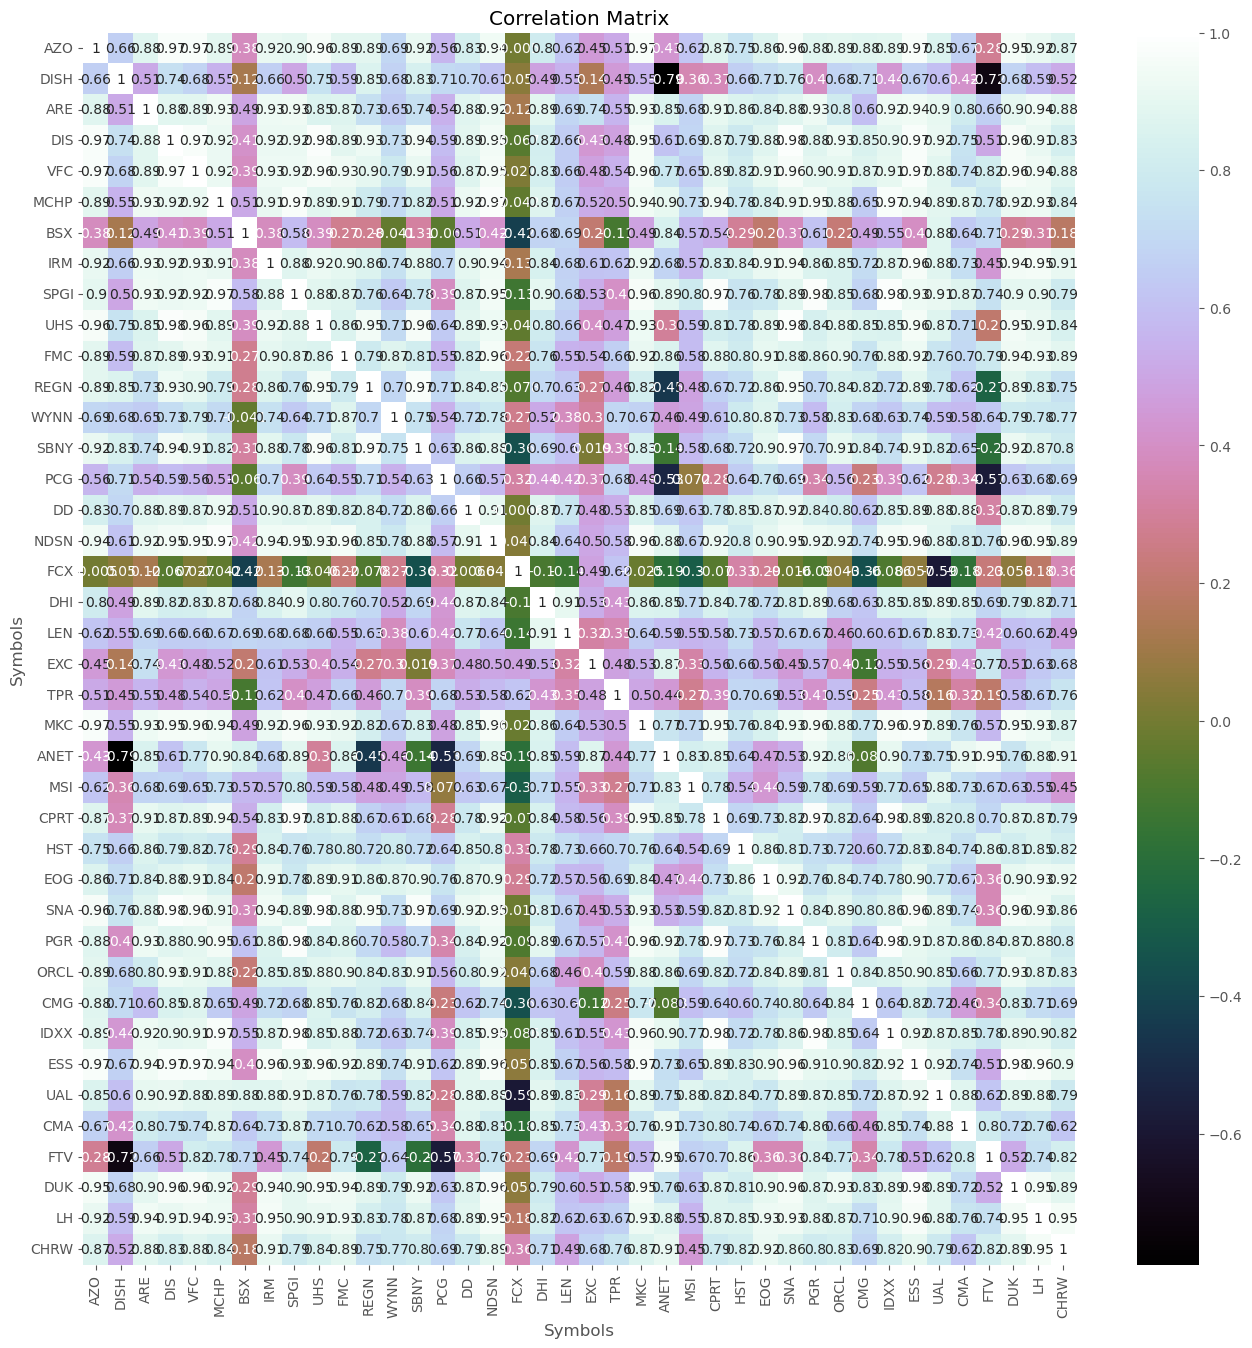

In [60]:
corr = ticket_df.corr()

plt.figure(figsize = (16,16))

plt.title("Correlation Matrix")

sns.heatmap(corr,annot =True,cmap = "cubehelix") # annot shows the number in the figure

In [61]:
missing_frac = ticket_df.isnull().mean().sort_values(ascending = False)
drop_list = sorted(list(missing_frac[missing_frac > 0.3].index)) 
ticket_df.drop(labels = drop_list,axis = 1,inplace = True) # drop columns of which missing values > 30%
ticket_df = ticket_df.fillna(method = "ffill")
ticket_df = ticket_df.dropna(axis = 0)

In [63]:
Daily_Linear_Returns = ticket_df.pct_change(1)
Daily_Linear_Returns = Daily_Linear_Returns[Daily_Linear_Returns.apply(lambda x:(x - x.mean()).abs() < (3 * x.std()
                                                       )).all(1)] #drop extreme value (delete rows) 

In [64]:
scaler = StandardScaler().fit(Daily_Linear_Returns) #fit model
scaled_df = pd.DataFrame(scaler.fit_transform(Daily_Linear_Returns),
                          columns = Daily_Linear_Returns.columns,
                          index = Daily_Linear_Returns.index) # transform data

In [65]:
Daily_Linear_Returns.dropna(how = "any",inplace = True)
scaled_df.dropna(how = "any",inplace = True)

In [67]:
prop = int(len(scaled_df) * 0.80) # train set size
# for model
X_Train = scaled_df[:prop]
X_Test = scaled_df[prop:]
# for backtest
X_Train_Raw = Daily_Linear_Returns[:prop]
X_Test_Raw = Daily_Linear_Returns[prop:]

In [68]:
stock_tickers = scaled_df.columns.values
n_tickers = len(stock_tickers)

In [69]:
pca = PCA()
PrincipalComponent = pca.fit(X_Train) # fit model

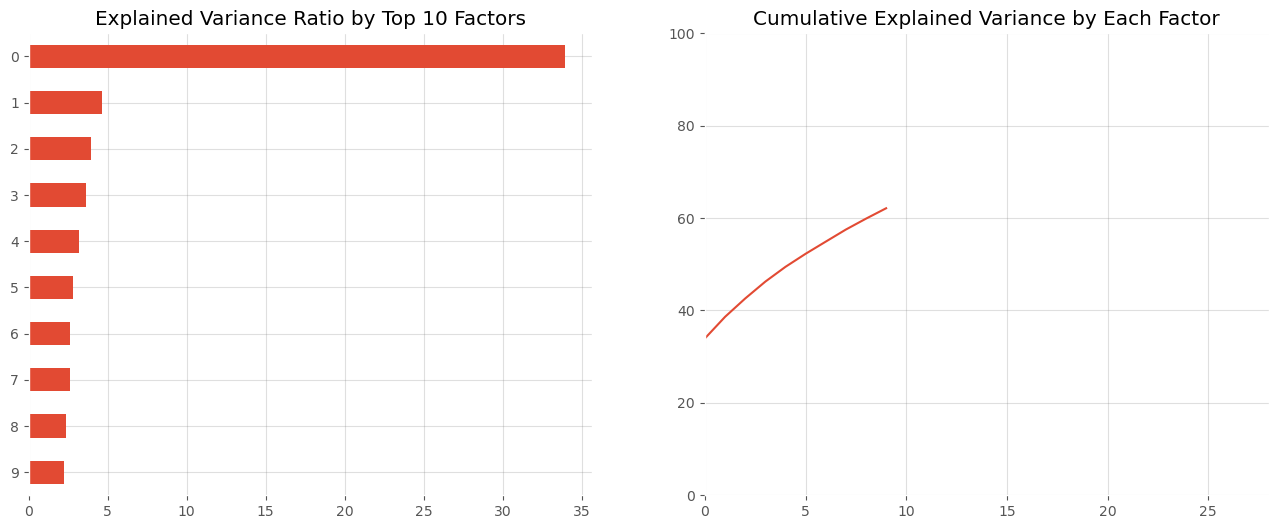

In [70]:
NumEigenvalues = 10
fig, axes = plt.subplots(ncols = 2,figsize = (16, 6))
# explained variance ratio of each component
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values() * 100
# cumsum explained variance ratio of components
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100

Series1.plot.barh(ylim = (0, 9),
                  title = "Explained Variance Ratio by Top 10 Factors",
                  ax = axes[0]);

Series2.plot(ylim = (0, 100),
             xlim = (0, 28),
             ax = axes[1],
             title = "Cumulative Explained Variance by Each Factor");

In [74]:
def PCWeights():
    """
    Principal Compoments Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])
# use eigen values of each components to allocate weight to each stock
# sum of weights equal to 1
    weights = weights.values.T
    return weights
weights = PCWeights()

array([[<AxesSubplot:title={'center':'Portfolio 0'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 1'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 2'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 3'}, xlabel='Symbols'>],
       [<AxesSubplot:title={'center':'Portfolio 4'}, xlabel='Symbols'>]],
      dtype=object)

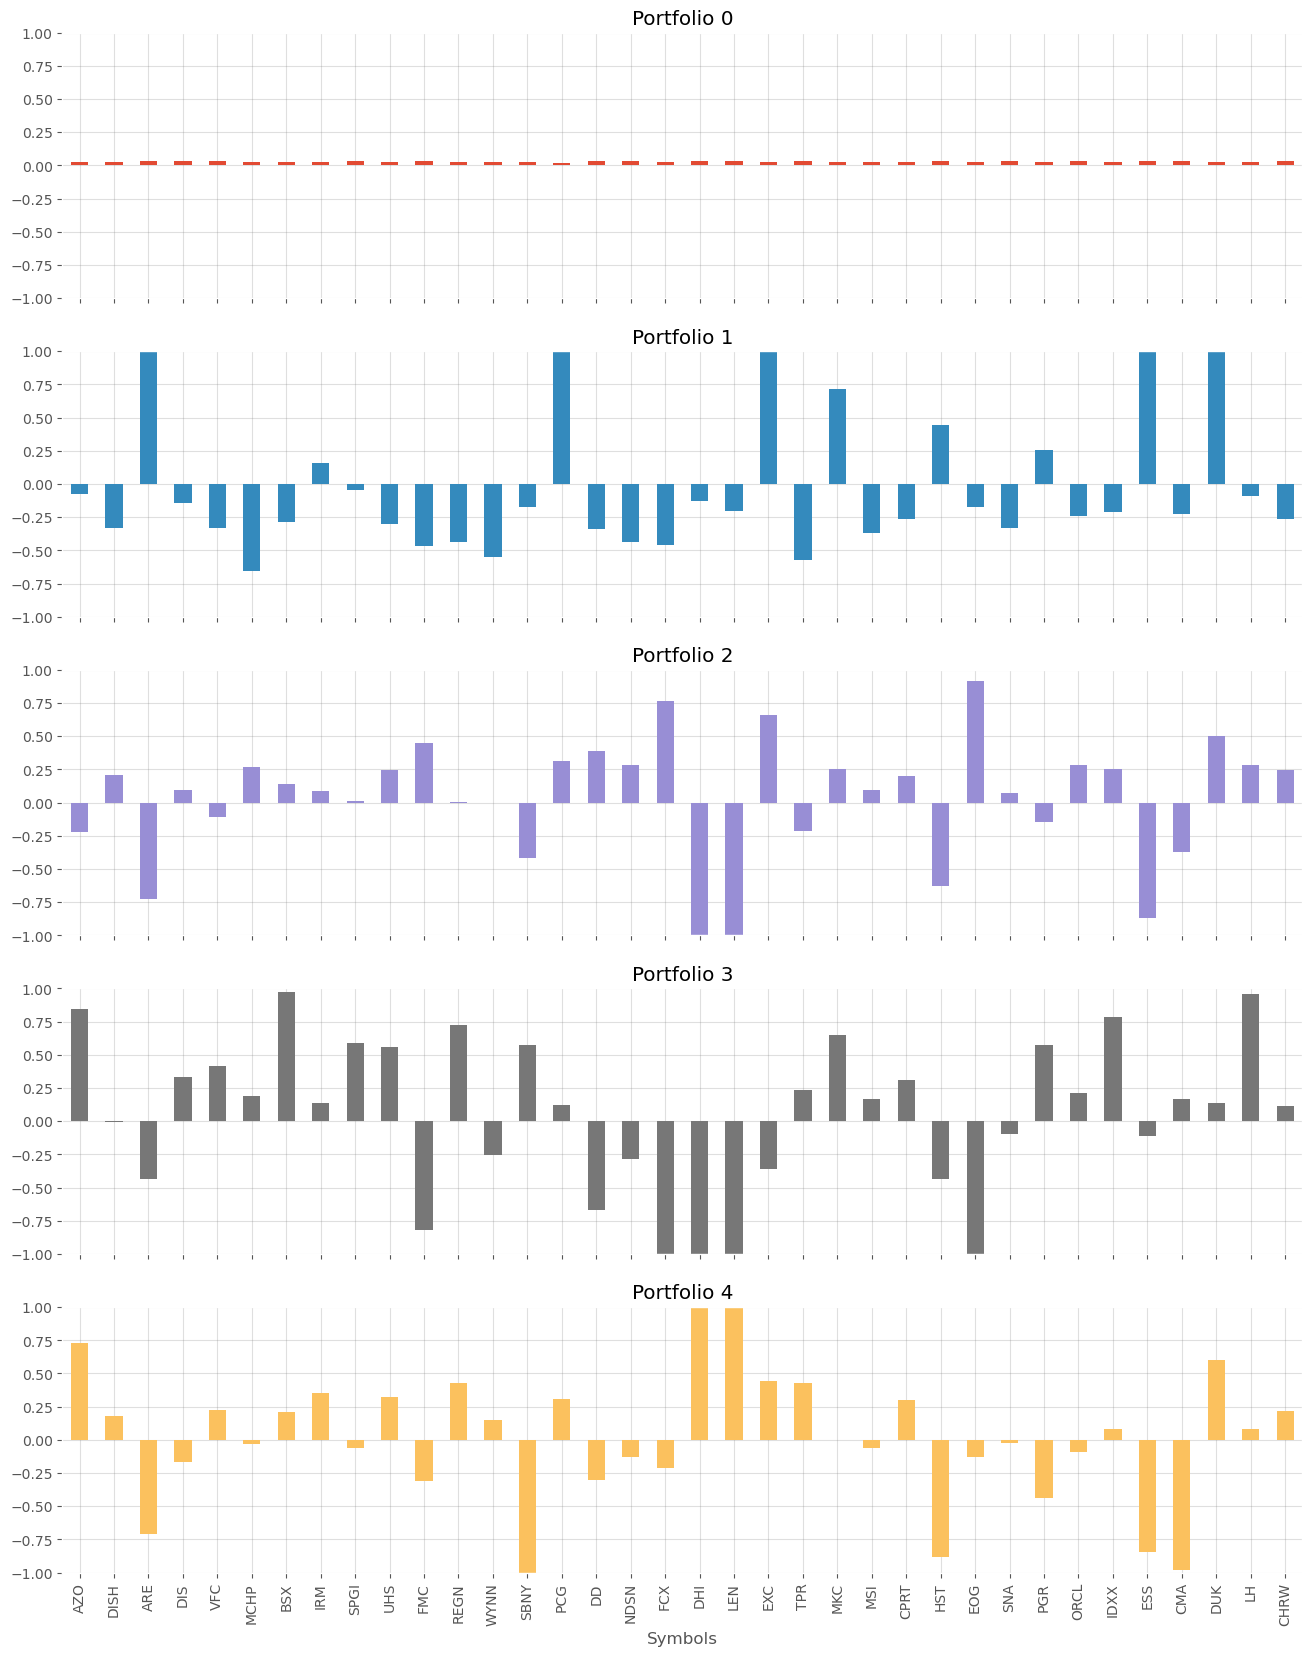

In [76]:
NumComponents = 5
# allocate eigen values
topPortfolios = pd.DataFrame(pca.components_[:NumComponents],columns = ticket_df.columns) 
# sum of weights equal to 1
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)
# name of portfolio
eigen_portfolios.index = [f"Portfolio {i}" for i in range( NumComponents)]
#bar plot
eigen_portfolios.T.plot.bar(subplots = True,
                            layout = (int(NumComponents), 1),
                            legend = False,
                            sharey = True,
                            ylim = (-1, 1),
                            figsize = (16, 20))

In [77]:
# define performance
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1 # for simple return
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe

In [85]:
def FindOptimalPortfolio():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_df.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )

In [86]:
 FindOptimalPortfolio()

Our Eigen Portfolio #7 with the highest Sharpe. Return inf%, vol = 5996.27%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
      Return        Vol         Sharpe
7        inf  59.962730  1.797693e+308
30       inf  61.555002  1.797693e+308
27       inf  50.491865  1.797693e+308
8        inf  59.617851  1.797693e+308
0   0.082615   0.137927   5.989743e-01
3   0.275274   0.753754   3.652033e-01
16  0.254298   1.200511   2.118248e-01
13  0.106570   0.702519   1.516969e-01
29  0.287170  25.872061   1.109963e-02
6  -1.000000  12.189013  -8.204110e-02
26 -1.000000   7.718460  -1.295595e-01
31 -1.000000   7.143693  -1.399836e-01
9  -0.264324   1.782712  -1.482707e-01
23 -1.000000   5.227503  -1.912959e-01
24 -1.000000   4

/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_31703/3250668036.py:6: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1 # for simple return
/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_31703/3250668036.py:6: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1 # for simple return
/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_31703/3250668036.py:6: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1 # for simple return
/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_31703/3250668036.py:6: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1 # for simple return


In [89]:
weights = PCWeights()

portfolio = pd.DataFrame()

def VisualizeEigen(weights,
                   plot = False,
                   portfolio = portfolio):
    
    portfolio = pd.DataFrame(data = {"weights": weights.squeeze()*100},
                             index = stock_tickers)
    
    portfolio.sort_values(by = ["weights"],
                          ascending = False,
                          inplace = True)
    
    if plot:
        
        print("Total weights of our Eigen-Portfolio: %2.f" % np.sum(portfolio)
             )
        
        portfolio.plot(figsize = (14, 10),
                       title = "Eigen-Portfolio Weights",
                       rot = 60,
                       xticks = range(0, len(stock_tickers), 1)
                      )
        
        plt.show()
        
    return portfolio

Total weights of our Eigen-Portfolio: 100


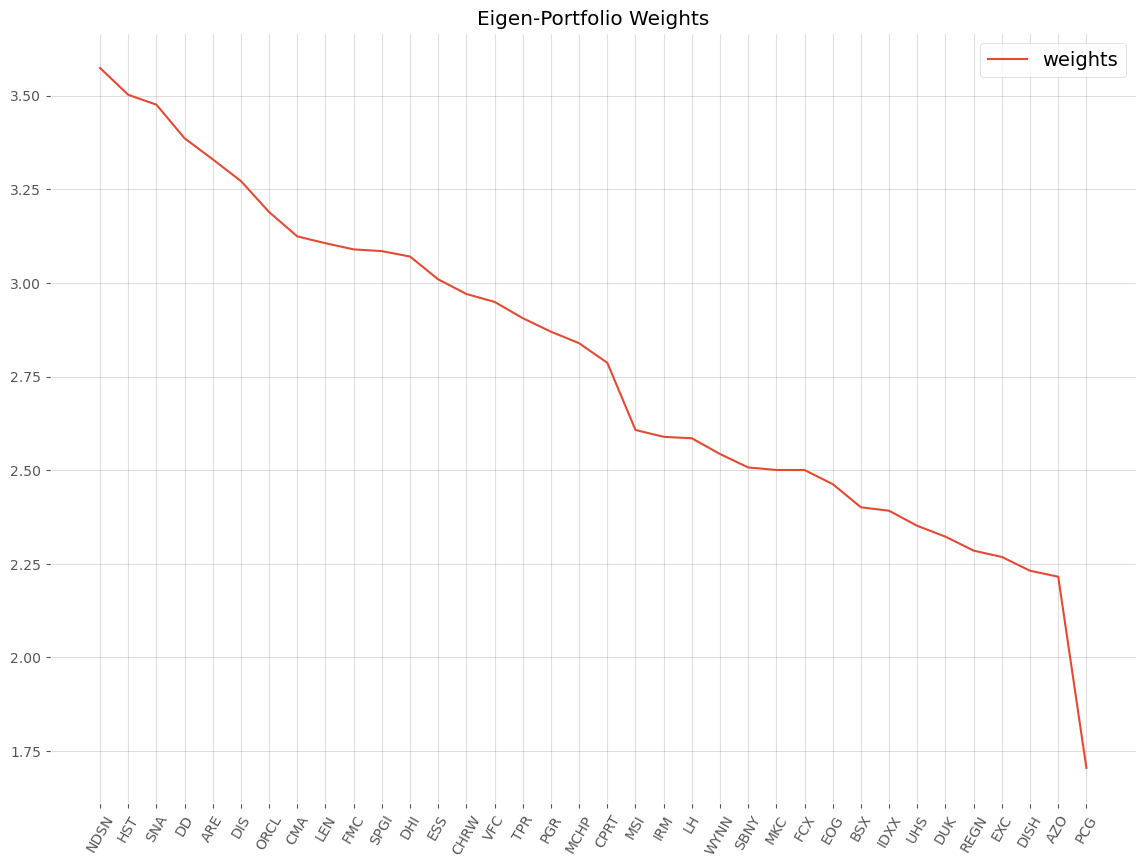

,weights
NDSN,3.573793
HST,3.502102
SNA,3.475748
DD,3.385977
ARE,3.329749
DIS,3.271711
ORCL,3.188977
CMA,3.124044
LEN,3.105852
FMC,3.089387


In [90]:
VisualizeEigen(weights = weights[0],plot = True)

In [91]:
def Backtest(eigen):
    
    eigen_prtfi = pd.DataFrame(data = {"weights": eigen.squeeze()},
                               index = stock_tickers)
    
    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)
    
    eigen_prti_returns = np.dot(X_Test_Raw.loc[:, eigen_prtfi.index], eigen)
    
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(),
                                        index = X_Test_Raw.index)
    
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    
    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatality = %.2f%%\nSharpe = %.2f" % 
          (returns*100, vol*100, sharpe)
         )
        
    equal_weight_return = (X_Test_Raw * (1 / len(pca.components_)
                                         )
                           ).sum(axis = 1)
    
    df_plot = pd.DataFrame({"Eigen-Portfolio Return": eigen_portfolio_returns,
                            "Equal Weight Index": equal_weight_return},
                           index = X_Test.index)
    
    np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 figsize = (16, 8)
                                )
    plt.show()

Our PCA-based Portfolio:
Return = 19.52%
Volatality = 10.73%
Sharpe = 1.82


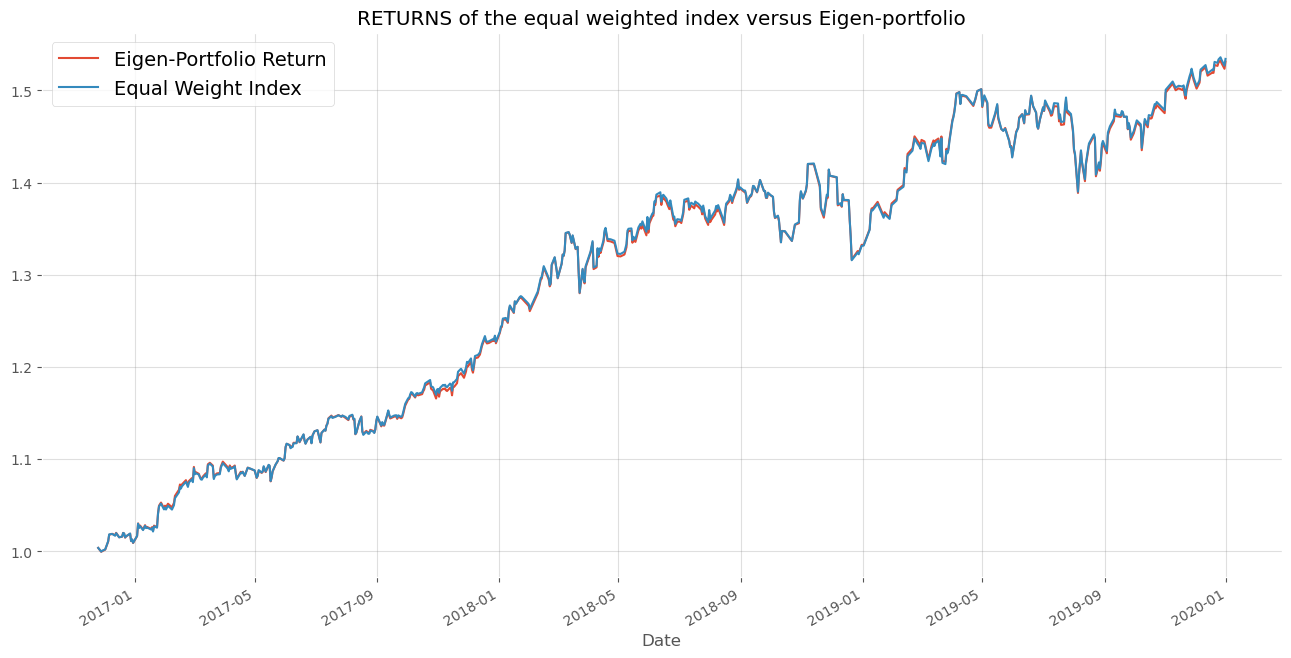

In [92]:
Backtest(eigen = weights[0]
         )

Our PCA-based Portfolio:
Return = -76.93%
Volatality = 129.37%
Sharpe = -0.59


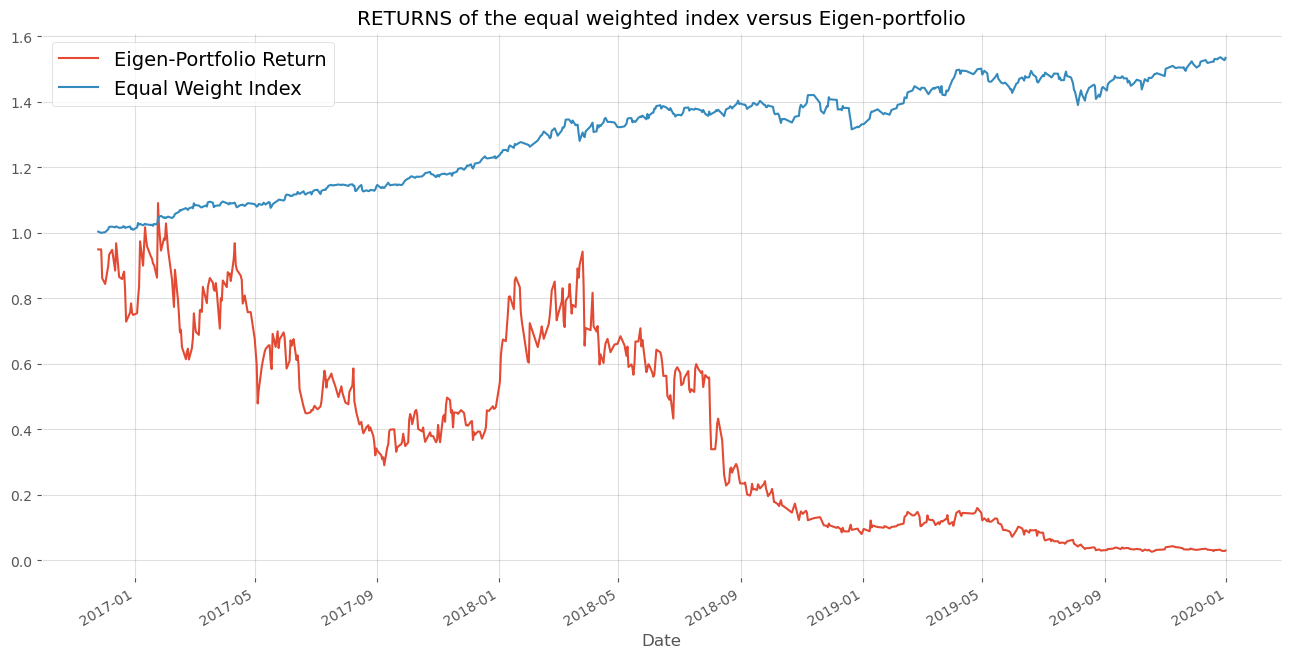

In [93]:
Backtest(eigen = weights[5]
         )

Our PCA-based Portfolio:
Return = -46.61%
Volatality = 105.68%
Sharpe = -0.44


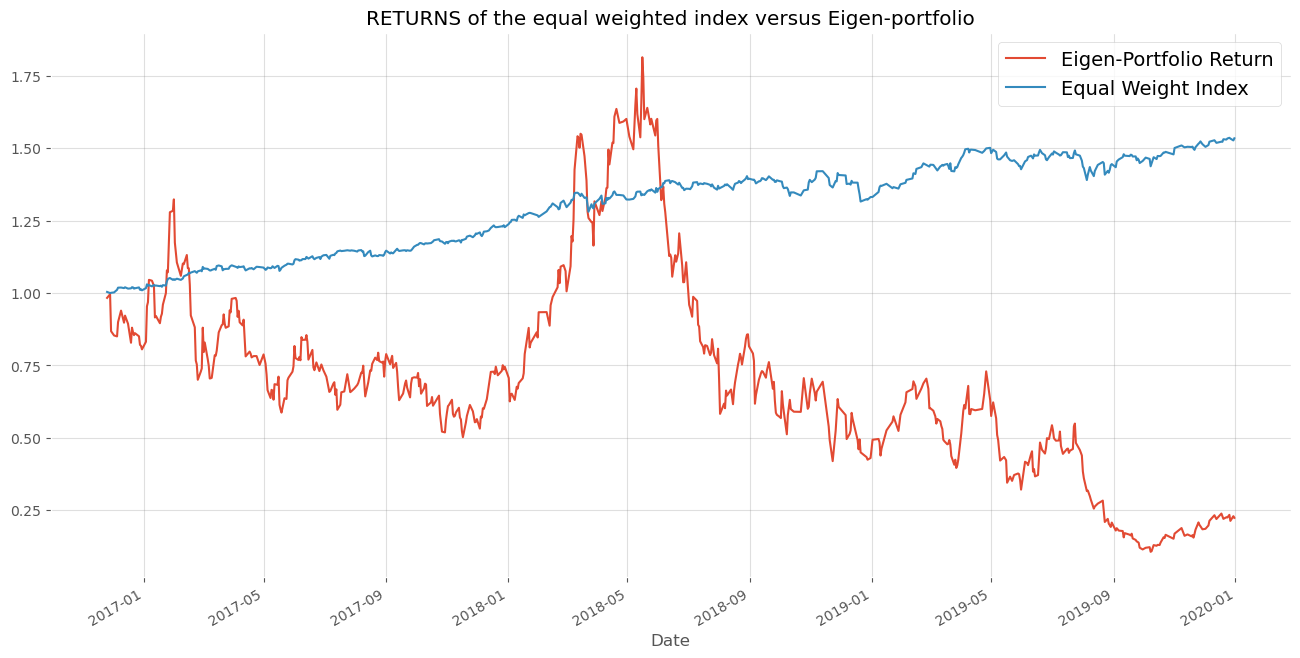

In [94]:
Backtest(eigen = weights[1]
         )

### <font color = red> Answer 1 is presented in the cell below: </font>

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 2 is presented in the cell below: </font>

## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 3 is presented in the cell below: </font>

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 </font>

    The answer is ____________ % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown ____________ % | Duration ____________ Days
    
    The 2nd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 6 </font>

    Below average year(s) : ____________ 
    
    Above average year(s) : ____________ 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: __________
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 8 </font>
    
    __________________________ strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊